#Step 1: Data Loading and Initial Inspection


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas # For handling geospatial data for choropleth

# Set plot style
sns.set_style("whitegrid")

In [ ]:
PATH = r'/content/drive/MyDrive/Colab Notebooks/Copy of ev_dataset.csv'
df = pd.read_csv(PATH)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [ ]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 n

In [ ]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 n

In [ ]:
print("\nDataset Description:")
df.describe().T


Dataset Description:


,count,mean,std,min,25%,50%,75%,max
Postal Code,112634.0,9.815623e+04,2.648733e+03,1.730000e+03,9.805200e+04,9.811900e+04,9.837000e+04,9.970100e+04
Model Year,112634.0,2.019003e+03,2.892364e+00,1.997000e+03,2.017000e+03,2.020000e+03,2.022000e+03,2.023000e+03
Electric Range,112634.0,8.781299e+01,1.023342e+02,0.000000e+00,0.000000e+00,3.200000e+01,2.080000e+02,3.370000e+02
Base MSRP,112634.0,1.793440e+03,1.078375e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.450000e+05
Legislative District,112348.0,2.980560e+01,1.470055e+01,1.000000e+00,1.800000e+01,3.400000e+01,4.300000e+01,4.900000e+01
DOL Vehicle ID,112634.0,1.994567e+08,9.398427e+07,4.777000e+03,1.484142e+08,1.923896e+08,2.191899e+08,4.792548e+08
2020 Census Tract,112634.0,5.296650e+10,1.699104e+09,1.101001e+09,5.303301e+10,5.303303e+10,5.305307e+10,5.603300e+10


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64


In [ ]:
print("\nNumber of Duplicate Rows:")
print(df.duplicated().sum())


Number of Duplicate Rows:
0


# 2: Exploratory Data Analysis (EDA)
This is where we answer the EDA questions we discussed earlier.
#2.1 Data Cleaning and Preprocessing




In [ ]:
df.dropna(subset=['Electric Range'], inplace=True)
print(f"Number of rows after dropping NaN in 'Electric Range': {len(df)}")

Number of rows after dropping NaN in 'Electric Range': 112634


In [ ]:
if 'Base MSRP' in df.columns:
    df['Base MSRP'].fillna(df['Base MSRP'].median(), inplace=True)
    print("Filled missing 'Base MSRP' with median.")


Filled missing 'Base MSRP' with median.


/tmp/ipython-input-42-792358499.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Base MSRP'].fillna(df['Base MSRP'].median(), inplace=True)


In [ ]:
if 'Model Year' in df.columns:
    df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')
    df.dropna(subset=['Model Year'], inplace=True) # Drop if still NaN after coerce
    df['Model Year'] = df['Model Year'].astype(int)
    print("Converted 'Model Year' to integer.")

Converted 'Model Year' to integer.


In [ ]:
if 'City' in df.columns:
    df['City'] = df['City'].astype(str).str.title()
    print("Cleaned 'City' column.")

Cleaned 'City' column.


In [ ]:
print("\nMissing Values After Initial Cleaning:")
print(df.isnull().sum()[df.isnull().sum() > 0])


Missing Values After Initial Cleaning:
Model                    20
Legislative District    286
Vehicle Location         24
Electric Utility        443
dtype: int64


#Univariate Analysis (Distributions)


.To understand how the data is distributed can be effectively visualized using a box plot.

.It displays the spread of data, highlighting the median, quartiles, and potential outliers, making it a great choice for summarizing distributions in a single plot.





Numerical Columns: ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']


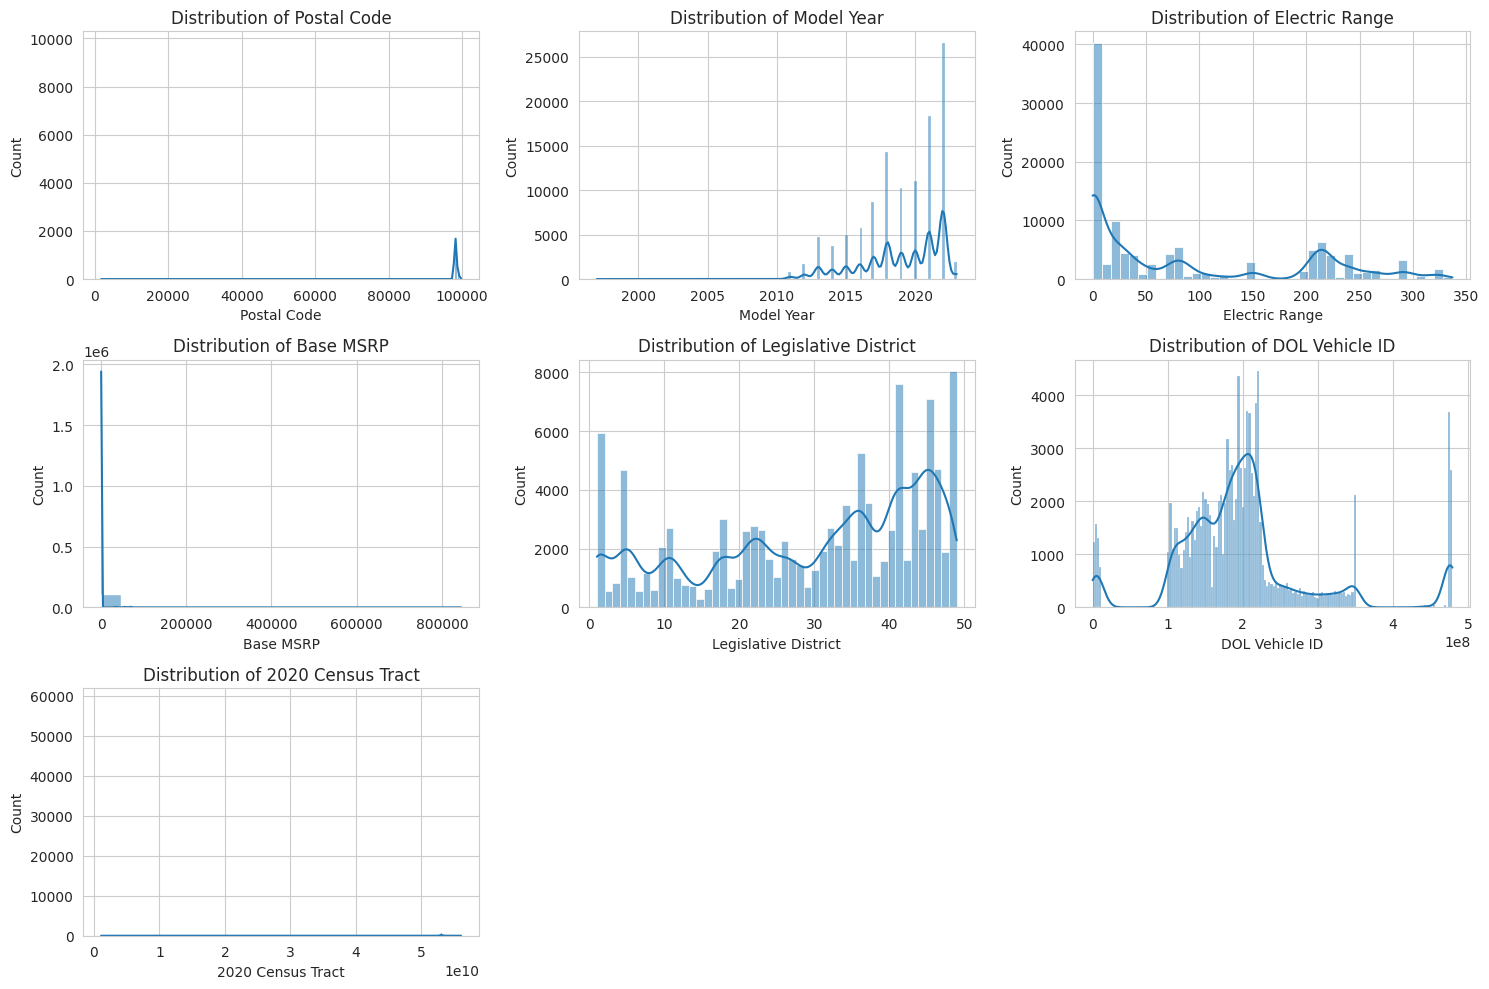

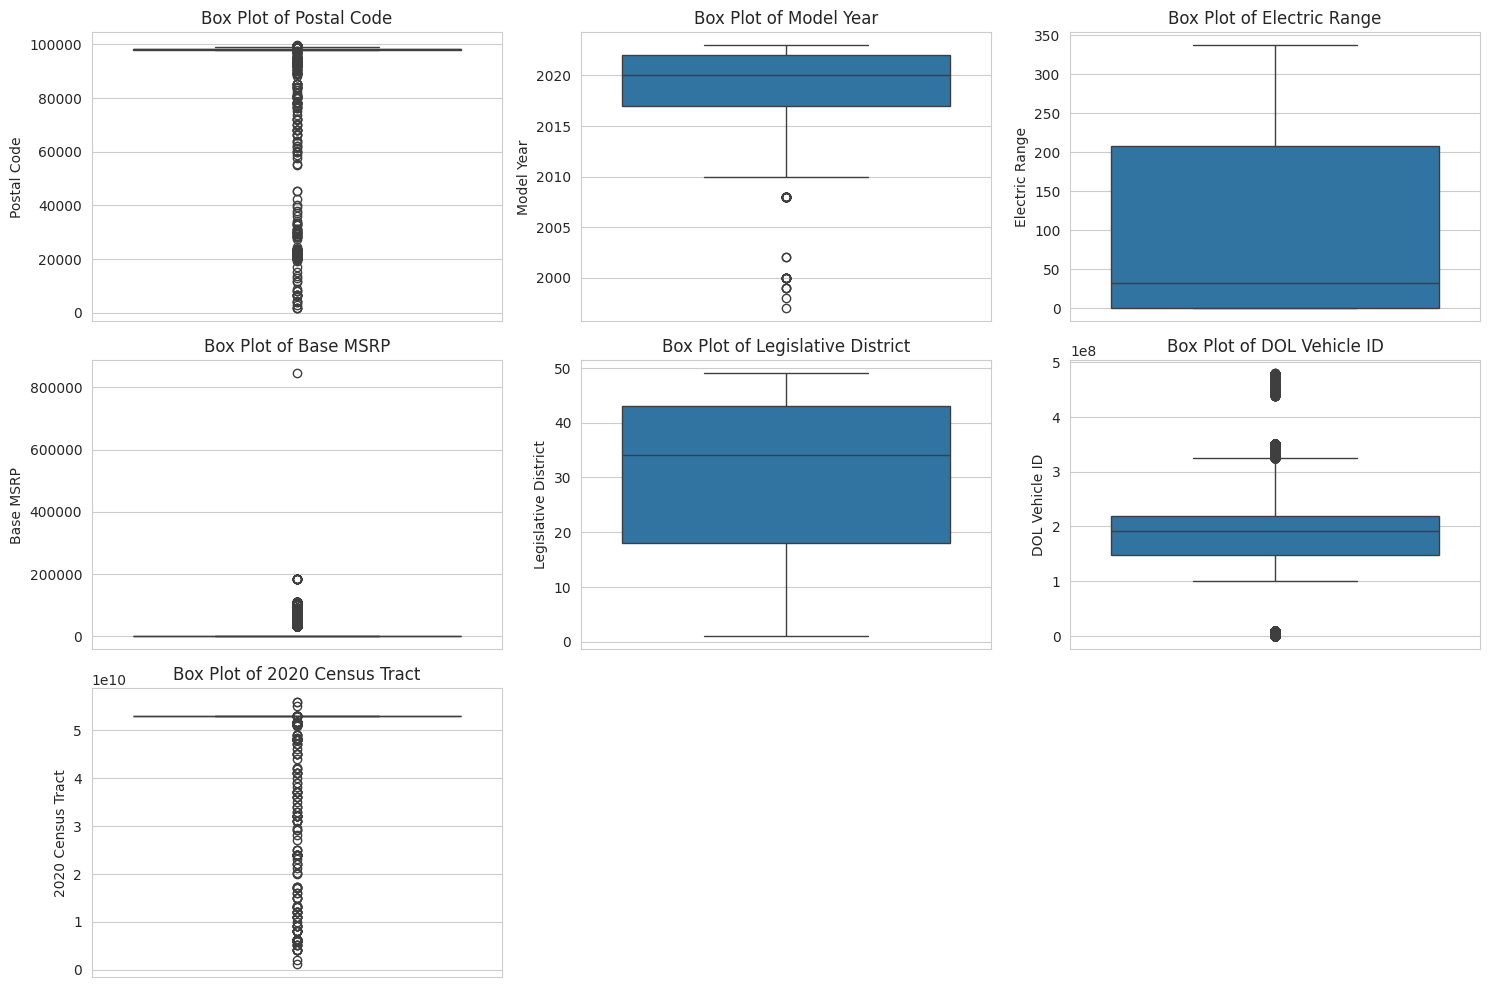


Categorical Columns: ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']


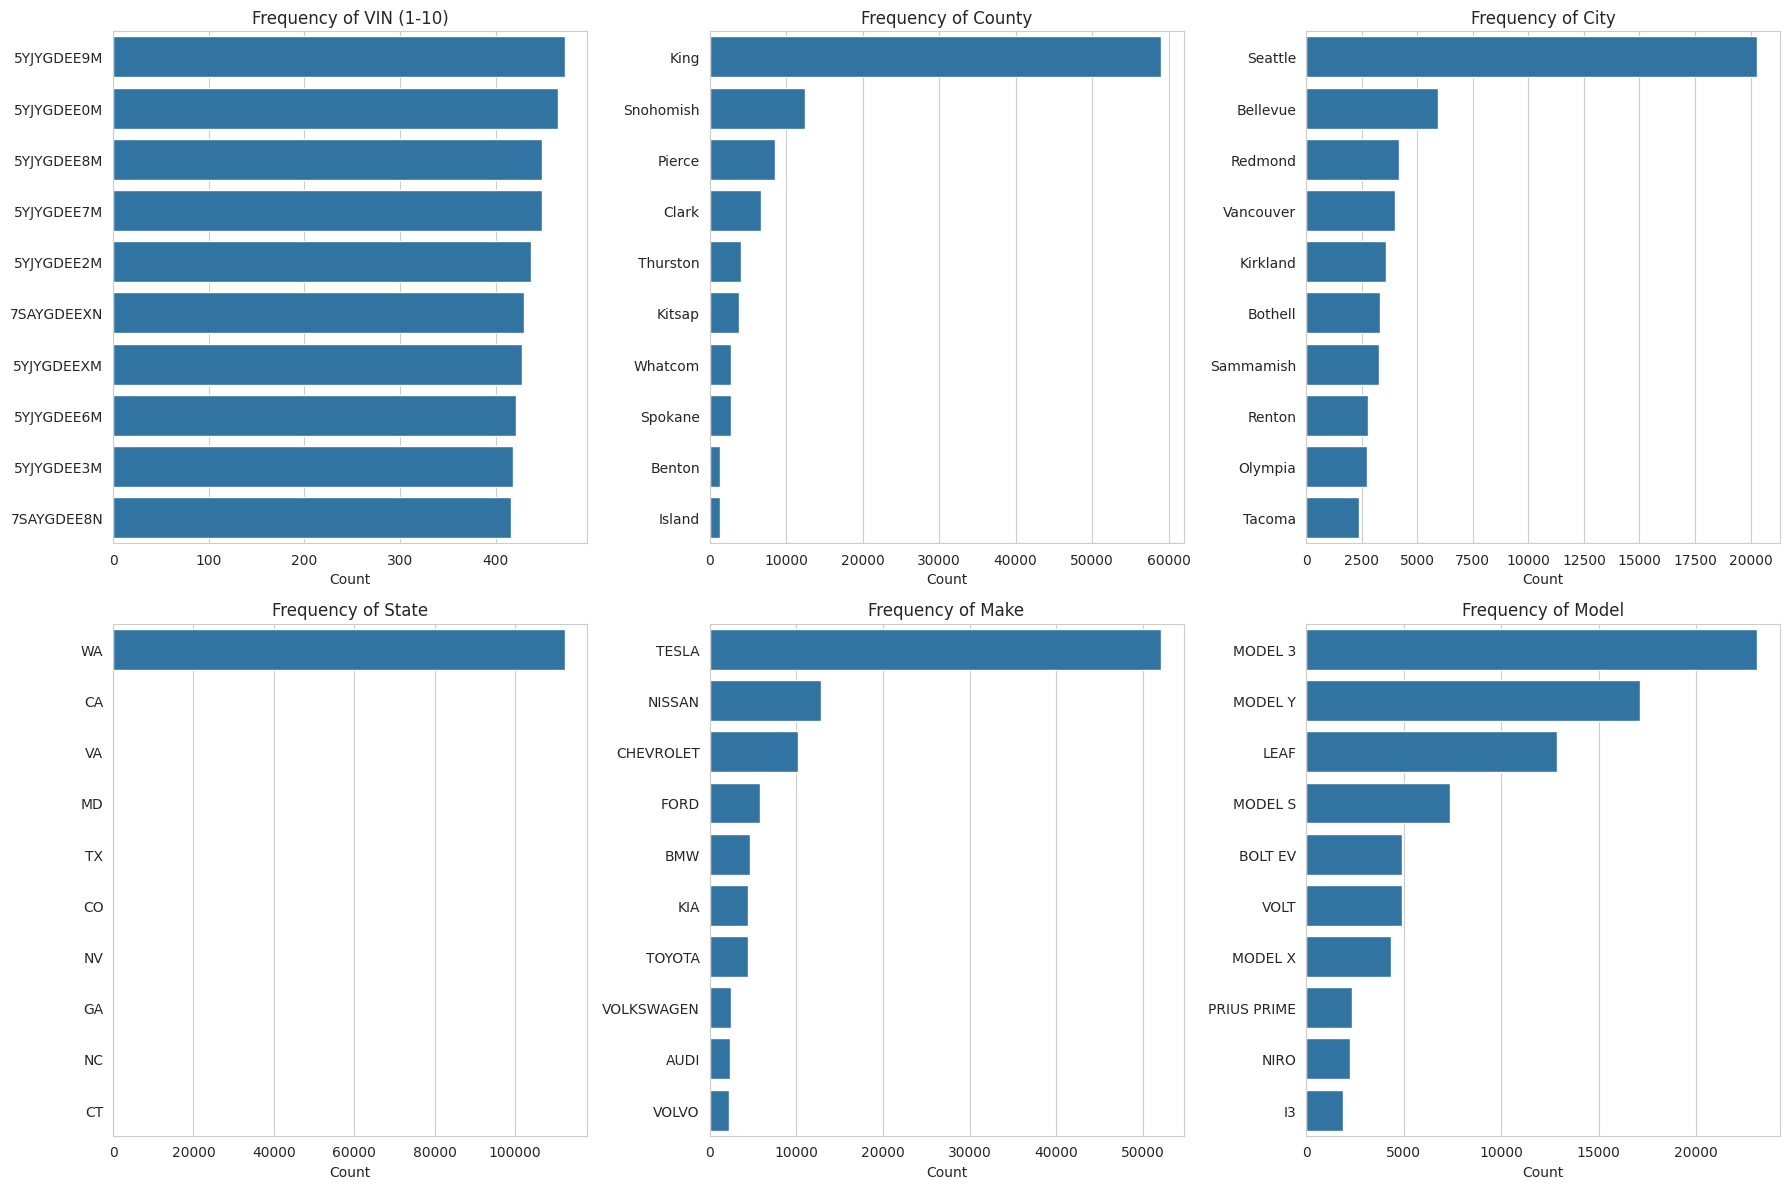

In [ ]:
# Numerical Features
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"\nNumerical Columns: {numerical_cols}")

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col].dropna())
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Categorical Features
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print(f"\nCategorical Columns: {categorical_cols}")

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols[:6]): # Limit to first few for readability
    plt.subplot(2, 3, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f'Frequency of {col}')
    plt.xlabel('Count')
    plt.ylabel('')
plt.tight_layout()
plt.show()

#Insight :
. Most vehicles have a range of 0-50 miles, indicating limited electric-only driving capability.

. Popular electric ranges are around 50, 100, and 200 miles, reflecting different vehicle tiers.

. A smaller number of vehicles exceed 200 miles on a single charge.

. The distribution is right-skewed, with most vehicles concentrated in the lower range.

#2.3 Bivariate/Multivariate Analysis (Relationships)



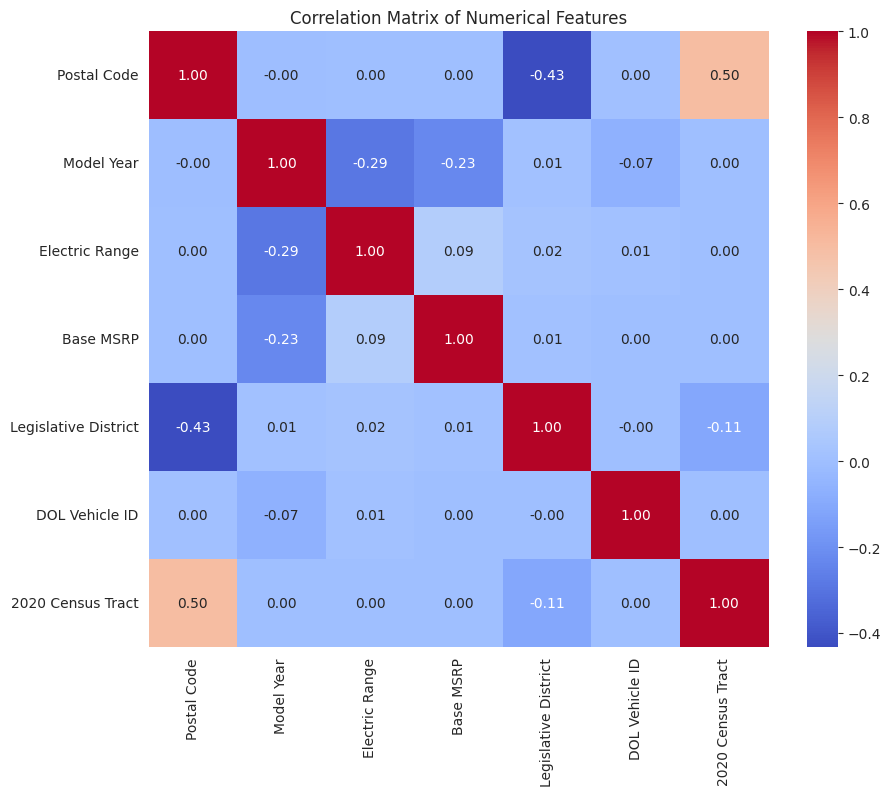

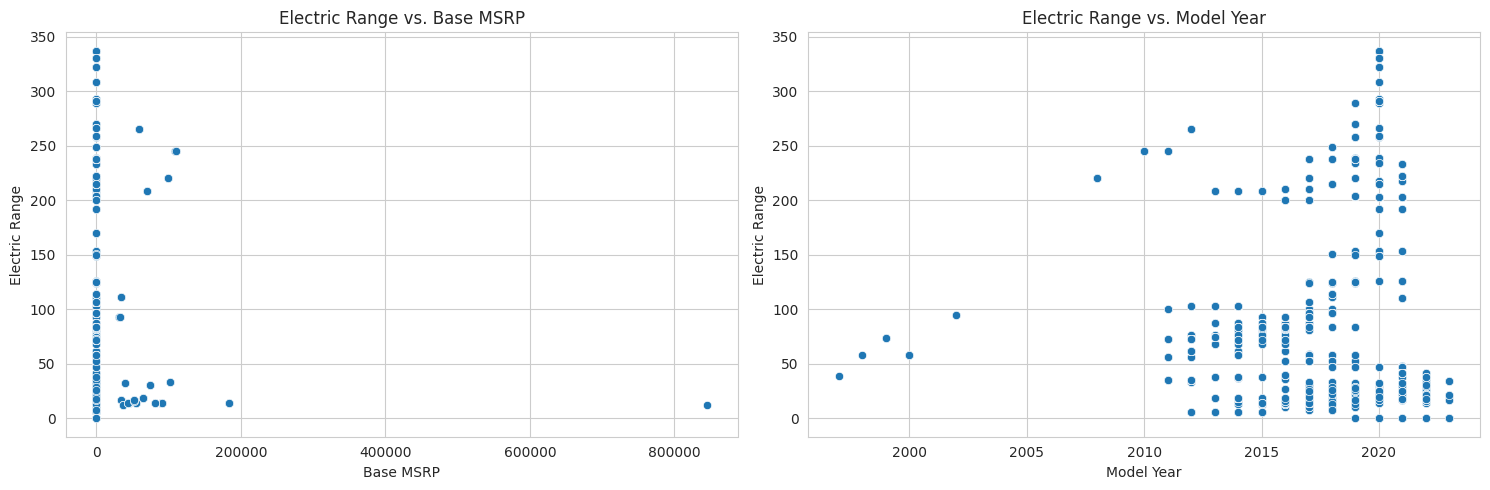

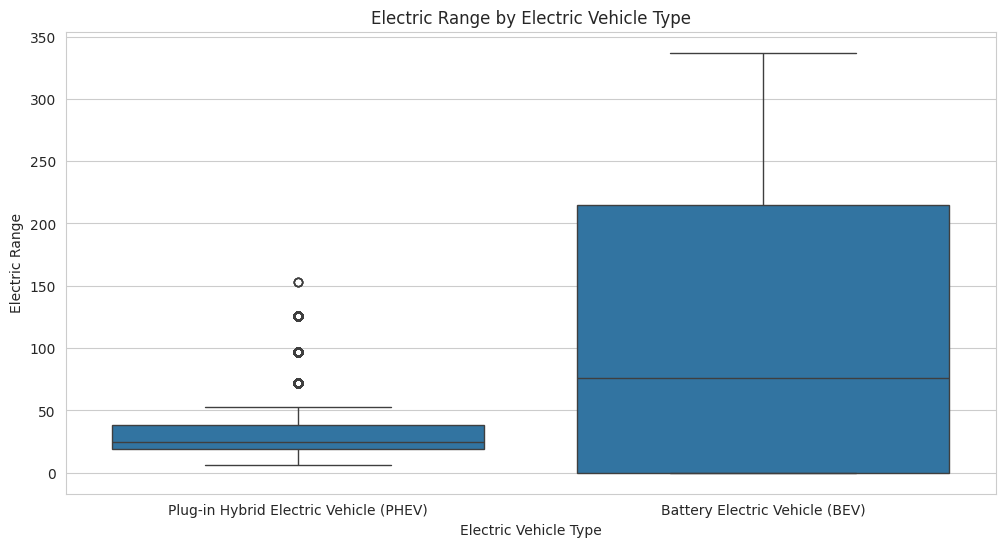

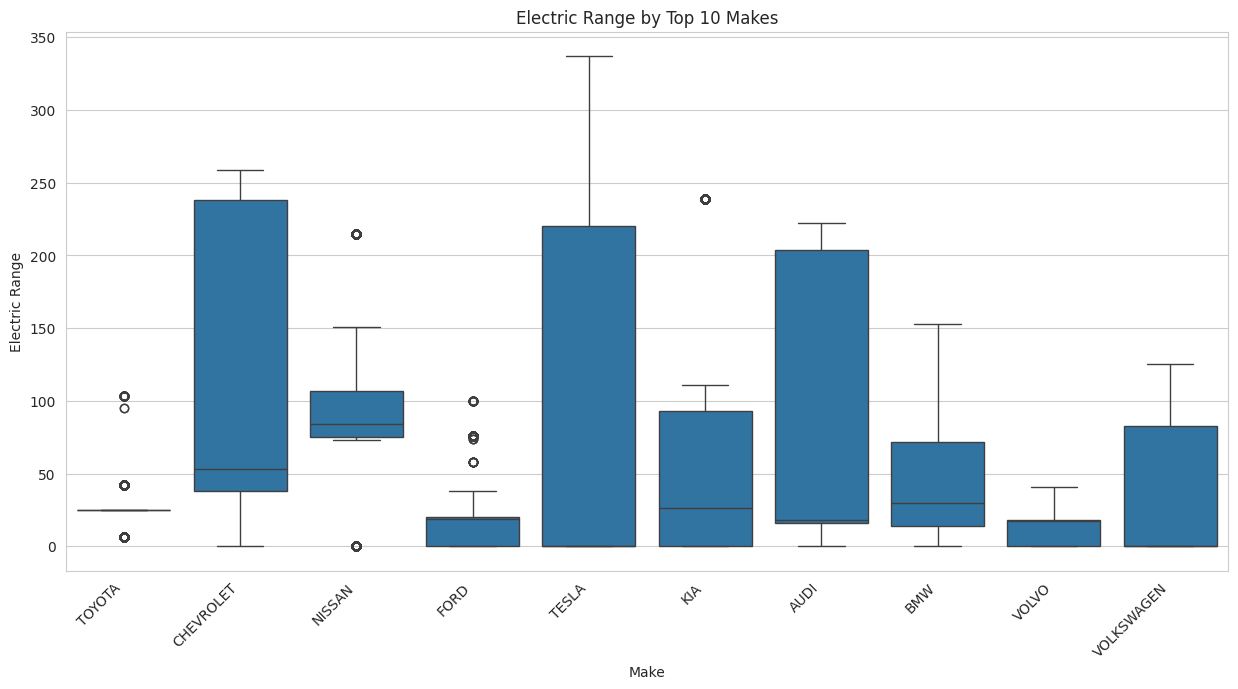

In [ ]:
# Correlation Matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Relationship between 'Electric Range' (target) and other numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Base MSRP', y='Electric Range', data=df)
plt.title('Electric Range vs. Base MSRP')
plt.subplot(1, 2, 2)
sns.scatterplot(x='Model Year', y='Electric Range', data=df)
plt.title('Electric Range vs. Model Year')
plt.tight_layout()
plt.show()

# Relationship between 'Electric Range' and categorical features
plt.figure(figsize=(12, 6))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df)
plt.title('Electric Range by Electric Vehicle Type')
plt.show()

plt.figure(figsize=(15, 7))
top_makes = df['Make'].value_counts().index[:10]
sns.boxplot(x='Make', y='Electric Range', data=df[df['Make'].isin(top_makes)])
plt.title('Electric Range by Top 10 Makes')
plt.xticks(rotation=45, ha='right')
plt.show()

#Step 3: Advanced Data Visualizations


In [ ]:
# For Choropleth Map: Aggregate EV count by State
# Ensure 'State' column exists and is clean (e.g., 'WA' for Washington)
if 'State' in df.columns:
    # Get the top 50 states by EV count, or just filter for 'WA' if that's the primary state
    # Assuming this dataset primarily focuses on Washington state, let's group by county within WA.
    # If the dataset has multiple states, you can group by 'State'.
    # Let's assume 'County' is the more granular geographical unit relevant to the dataset.

    # Option 1: Choropleth by Washington State Counties (more specific, requires county GeoJSON)
    # This requires a GeoJSON file for WA counties.
    # Example: you'd need a 'wa_counties.geojson' file.
    # If you don't have it, this part will be tricky.
    # counties_df = df[df['State'] == 'WA'].groupby('County').size().reset_index(name='EV_Count')
    # counties_df['County'] = counties_df['County'].str.replace(' County', '') # Clean names for joining

    # Option 2 (Easier for generic tutorial): Choropleth by State (if your data has multiple states)
    # Check if 'State' column exists
    if 'State' in df.columns and df['State'].nunique() > 1: # Check if there are multiple states
        state_ev_counts = df.groupby('State').size().reset_index(name='EV_Count')
        state_ev_counts['State_Code'] = state_ev_counts['State'] # Assuming State has US state codes like 'WA', 'CA' etc.

        fig = px.choropleth(state_ev_counts,
                            locations='State_Code',
                            locationmode="USA-states", # Important for US state codes
                            color='EV_Count',
                            scope="usa",
                            color_continuous_scale="Viridis",
                            title='Electric Vehicle Population by US State')
        fig.show()
    elif 'County' in df.columns and 'State' in df.columns and df['State'].nunique() == 1:
        # If it's primarily a single state (e.g., Washington) and has 'County'
        # This requires a GeoJSON for counties. This part is more advanced as finding a generic
        # WA counties geojson that aligns perfectly without manual cleaning is tricky for a tutorial.
        print("\nChoropleth Map by County (Washington State) - Requires specific GeoJSON file for WA counties.")
        print("You would typically need to download a GeoJSON file for Washington State counties (e.g., from US Census Bureau).")
        print("Then, load it using geopandas and merge with aggregated data.")
        print("Example conceptual code (requires 'WA_Counties.geojson' and proper column names):")
        """
        # Load GeoJSON for WA counties (replace with your actual file path)
        try:
            gdf = geopandas.read_file("path/to/your/WA_Counties.geojson")
            # Ensure county names match between your df and gdf
            county_ev_counts = df.groupby('County').size().reset_index(name='EV_Count')
            # Assuming 'NAME' column in gdf holds county names like 'King'
            merged_gdf = gdf.merge(county_ev_counts, left_on='NAME', right_on='County', how='left')
            merged_gdf['EV_Count'] = merged_gdf['EV_Count'].fillna(0) # Fill non-EV counties with 0

            fig = px.choropleth_mapbox(merged_gdf,
                                       geojson=merged_gdf.geometry,
                                       locations=merged_gdf.index, # Use index if geometry is the key
                                       color="EV_Count",
                                       color_continuous_scale="Viridis",
                                       mapbox_style="carto-positron", # or "open-street-map"
                                       zoom=6, center={"lat": 47.5, "lon": -120.5},
                                       opacity=0.5,
                                       title='Electric Vehicle Population by Washington County')
            fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
            fig.show()
        except Exception as e:
            print(f"Could not generate county choropleth: {e}")
            print("Please ensure you have a valid GeoJSON file for counties and the path is correct.")
        """
    else:
        print("\nSkipping Choropleth Map: 'State' or 'County' column not suitable for choropleth mapping.")

In [ ]:
!pip install bar_chart_race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.2 MB/s eta 0:00:00


In [ ]:
import bar_chart_race as bcr

In [ ]:

make_counts_per_year = df.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

pivot_df = make_counts_per_year.pivot(index='Model Year', columns='Make', values='Count').fillna(0)

# bcr.bar_chart_race(df=pivot_df,
#                    title='Electric Vehicles Make Count Over Time',

#                     n_bars=10,

#                    period_length=1000,
# )

#3.2 Animated (Racing) Bar Plot: Top Makes Over Years



In [ ]:
# Create the bar chart race with color effects
bcr.bar_chart_race(
    df=pivot_df,
    title='Electric Vehicles Make Count Over Time',
    n_bars=10,                    # Top 10 bars to display
    period_length=1000,            # Speed of the race (1000 ms = 1 second per frame)
    fixed_order=False,             # Let the order of bars change as they race
    fixed_max=False,               # Allow the bar lengths to change dynamically
    steps_per_period=30,           # Smoother transitions between frames
    interpolate_period=False,      # No interpolation between frames for cleaner transitions
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},  # Customize the period label
    bar_label_size=7,              # Label size for the bars
    tick_label_size=8,             # Size for the tick labels
    figsize=(6, 4),                # Size of the chart
    dpi=144,                       # DPI for higher resolution
    # cmap='viridis'                 # You can also add colormap for gradient effect
)

/usr/local/lib/python3.11/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/usr/local/lib/python3.11/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/usr/local/lib/python3.11/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/usr/local/lib/python3.11/dist-packages/bar_chart_race/_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`



In [ ]:
# For Racing Bar Plot: Aggregate EV count by Make and Model Year
# Ensure 'Make' and 'Model Year' columns exist and are clean.
if 'Make' in df.columns and 'Model Year' in df.columns:
    # Filter for reasonable model years to avoid very old or future data points if any
    # Assuming data is from 2010 onwards for EVs
    animated_data = df[(df['Model Year'] >= 2010) & (df['Model Year'] <= df['Model Year'].max())] \
                      .groupby(['Model Year', 'Make']).size().reset_index(name='EV_Count')

    # Get top N makes for better visualization (e.g., top 15 overall)
    top_overall_makes = animated_data.groupby('Make')['EV_Count'].sum().nlargest(15).index

    # Filter animated_data to include only top overall makes
    animated_data = animated_data[animated_data['Make'].isin(top_overall_makes)]

    # Sort data for proper animation frame order
    animated_data = animated_data.sort_values(by=['Model Year', 'EV_Count'], ascending=[True, False])

    fig = px.bar(animated_data,
                 x='EV_Count',
                 y='Make',
                 color='Make', # Color bars by make
                 animation_frame='Model Year',
                 animation_group='Make', # Ensures bars for the same make are tracked
                 range_x=[0, animated_data['EV_Count'].max() * 1.1], # Set a consistent x-axis range
                 title='Evolution of Top EV Makes Over Years',
                 labels={'EV_Count': 'Number of Electric Vehicles', 'Make': 'Vehicle Make'},
                 orientation='h') # Horizontal bars

    fig.update_layout(showlegend=False) # Often better without legend for racing bars
    fig.update_yaxes(autorange="reversed") # Keep the highest bar at the top

    # Add a slider and buttons for animation control
    fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 500 # Speed of animation
    fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 300 # Transition speed

    fig.show()
else:
    print("\nSkipping Racing Bar Plot: 'Make' or 'Model Year' column not suitable or missing.")

#

#Step 4: Feature Engineering (If Needed)


In [ ]:
# Example: Create 'Vehicle_Age' feature
if 'Model Year' in df.columns:
    current_year = pd.to_datetime('today').year
    df['Vehicle_Age'] = current_year - df['Model Year']
    print("\nCreated 'Vehicle_Age' feature.")
    print(df[['Model Year', 'Vehicle_Age']].head())


Created 'Vehicle_Age' feature.
   Model Year  Vehicle_Age
0        2022            3
1        2013           12
2        2011           14
3        2017            8
4        2019            6


#Step 5: Linear Regression Model


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define target and features
TARGET = 'Electric Range'
# Select features that seem relevant from EDA and are mostly numerical or categorical to be encoded
# Exclude highly correlated features if present (e.g., if you had 'city' and 'zip code', pick one)
# Exclude ID-like columns
features = ['Model Year', 'Base MSRP', 'Electric Vehicle Type', 'Make', 'Vehicle_Age'] # Added Vehicle_Age
# Ensure all chosen features exist in the dataframe
features = [f for f in features if f in df.columns]

X = df[features]
y = df[TARGET]

# Identify categorical and numerical features for preprocessing
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include=np.number).columns

# Create a preprocessor using ColumnTransformer
# One-hot encode categorical features, pass numerical features directly
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ],
    remainder='passthrough' # Keep other columns not explicitly transformed (if any)
)

print(f"\nFeatures selected for Linear Regression: {features}")
print(f"Categorical features to encode: {list(categorical_features)}")
print(f"Numerical features: {list(numerical_features)}")


Features selected for Linear Regression: ['Model Year', 'Base MSRP', 'Electric Vehicle Type', 'Make', 'Vehicle_Age']
Categorical features to encode: ['Electric Vehicle Type', 'Make']
Numerical features: ['Model Year', 'Base MSRP', 'Vehicle_Age']


#5.2 Data Splitting



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 90107 samples
Testing set size: 22527 samples


#5.3 Model Training



In [ ]:
# Create a pipeline that first preprocesses the data then applies Linear Regression
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])

# Train the model
print("\nTraining Linear Regression Model...")
model_pipeline.fit(X_train, y_train)
print("Model training complete.")


Training Linear Regression Model...
Model training complete.


#5.4 Model Evaluation




--- Model Evaluation ---
Mean Absolute Error (MAE): 70.81
Mean Squared Error (MSE): 7086.19
Root Mean Squared Error (RMSE): 84.18
R-squared (R2): 0.3243


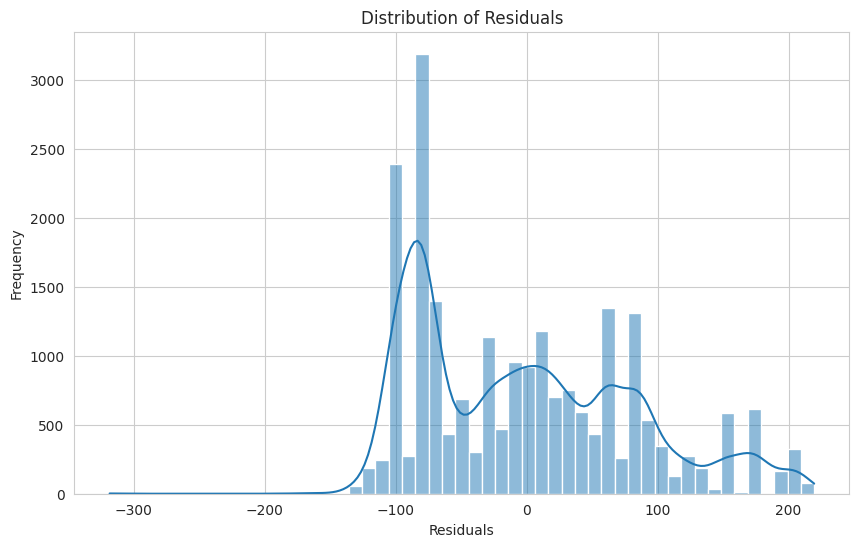

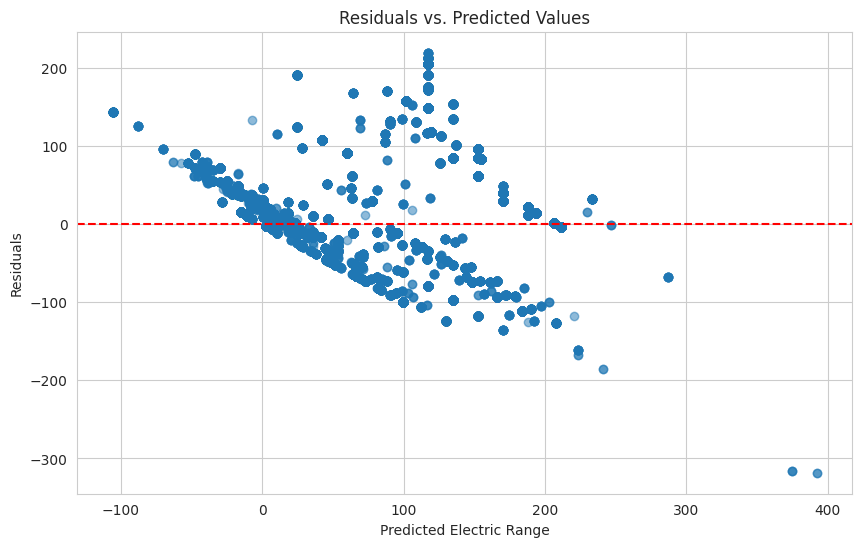

In [ ]:
# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")

# Visualize residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Electric Range')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

#5.5 Interpretation of Coefficients



In [ ]:
# Get the feature names after one-hot encoding
try:
    ohe_feature_names = model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
    all_feature_names = np.concatenate([ohe_feature_names, numerical_features])

    coefficients = model_pipeline.named_steps['regressor'].coef_
    intercept = model_pipeline.named_steps['regressor'].intercept_

    print("\n--- Model Coefficients ---")
    print(f"Intercept: {intercept:.2f}")
    for feature, coef in zip(all_feature_names, coefficients):
        print(f"{feature}: {coef:.4f}")

    print("\nInterpretation Notes:")
    print("- A positive coefficient means that as the feature increases, Electric Range tends to increase.")
    print("- A negative coefficient means that as the feature increases, Electric Range tends to decrease.")
    print("- For one-hot encoded categorical features (e.g., 'Make_TESLA'), the coefficient represents the change in Electric Range compared to the dropped baseline category for that feature.")
    print("- 'Model Year' and 'Vehicle_Age' will likely have opposite signs, as they are inversely related.")

except AttributeError:
    print("\nCould not display coefficients due to one-hot encoding complexity.")
    print("If you want to easily see coefficients, consider using a simpler model or more advanced techniques to extract names.")
except Exception as e:
    print(f"\nAn error occurred while trying to get coefficients: {e}")


--- Model Coefficients ---
Intercept: 17887.51
Electric Vehicle Type_Battery Electric Vehicle (BEV): 45.2889
Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV): -45.2889
Make_AUDI: 26.1228
Make_AZURE DYNAMICS: -0.3551
Make_BENTLEY: 0.0796
Make_BMW: 19.2476
Make_CADILLAC: -2.3018
Make_CHEVROLET: 19.7717
Make_CHRYSLER: 26.8237
Make_FIAT: -27.0247
Make_FISKER: -0.9589
Make_FORD: -61.6613
Make_GENESIS: -0.2713
Make_HONDA: 9.1815
Make_HYUNDAI: 6.0802
Make_JAGUAR: 17.1469
Make_JEEP: 29.3085
Make_KIA: 26.8094
Make_LAND ROVER: 0.5374
Make_LEXUS: 1.2589
Make_LINCOLN: 4.7710
Make_LUCID MOTORS: -1.5645
Make_MERCEDES-BENZ: -8.4471
Make_MINI: -1.0072
Make_MITSUBISHI: -0.3458
Make_NISSAN: -57.3748
Make_POLESTAR: 0.2805
Make_PORSCHE: 5.1559
Make_RIVIAN: -19.6930
Make_SMART: -13.5137
Make_SUBARU: 0.3240
Make_TESLA: 35.5276
Make_TH!NK: -0.2668
Make_TOYOTA: -3.1965
Make_VOLKSWAGEN: -35.7905
Make_VOLVO: 5.3457
Model Year: -8.8590
Base MSRP: -0.0004
Vehicle_Age: 8.8590

Interpretation Notes:
- 